<a href="https://colab.research.google.com/github/andrerizzo/House-Pricing-with-ANN/blob/master/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from local drive to Google Drive
from google.colab import files

# Read uploaded file
import io

# Create train and test datasets
from sklearn.model_selection import train_test_split

# Feature engineering - rescale observations
from sklearn.preprocessing import MinMaxScaler

# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Creates ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and save a trained model
from tensorflow.keras.models import load_model

### Load dataset

In [2]:
# Upload local file to Google Colab
file = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
df = pd.read_csv(io.BytesIO(file['kc_house_data.csv']))

### Exploratory Data Analysis

### Feature Description  
**Id:** Unique Id for each house sold.  
**Date:**	Date of house sale.  
**price:**	House sale price.  
**bedrooms:**	Number of bedrooms.  
**bathrooms:** Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower.  
**sqft_living:**	Square footage of interior living space of the house.  
**sqft_lot:**	Land area in square feet.  
**floors:**	Number of floors.  
**waterfront:**	Label to indicate whether the house was with waterfront or not.  
**view:**	Labels from 0 to 4 to indicate the view of house.  
**condition:**	Labels from 1 to 5 to indicate the condition of the house.  
**grade:**	Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.  
**sqft_above:**	Above ground level interior housing space in square feet.  
**sqft_basement:**	Below ground level interior housing space in square feet.  
**yr_built:**	The year of construction of the house ranging from 1900 to 2015.  
**yr_renovated:**	The year of last renovation of the house ranging from 1934 to 2015.  
**zipcode:**	Zipcode area of the house.  
**lat:**	Latitude  
**long:**	Longitude  
**sqft_living15:**	The interior living space in square feet for the nearest 15 neighbors.  
**sqft_lot15:**	The land area in square feet for the nearest 15 neighbors.  

In [4]:
# Check the first 5 observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Analyse feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations:  


*   Id: Remove label.
*   Date: Remove label.
*   floors: Change to integer.
*   waterfront: ordinal
*   condition: ordinal
*   grade: ordinal
*   zipcode: string




In [6]:
# Remove Id
df = df.drop('id', axis=1)

In [7]:
# Remove Date
df = df.drop('date', axis=1)

In [8]:
# Change zipcode to object
df['zipcode'] = df['zipcode'].astype(object)

In [9]:
# Calculate measures only for the numerical features on the dataset without scientific notation

numerical_features = df.select_dtypes(include=['int64', 'float64'])

count_values = pd.DataFrame(numerical_features.count())
count_values.columns = ['Count']

null_values = pd.DataFrame(numerical_features.isnull().sum())
null_values.columns = ['Null']

mean_values = pd.DataFrame(numerical_features.mean())
mean_values.columns = ['Mean']
mean_values['Mean'] = mean_values['Mean'].apply(lambda x: "{:.4f}".format(x))

median_values = pd.DataFrame(numerical_features.median())
median_values.columns = ['Median']
median_values['Median'] = median_values['Median'].apply(lambda x: "{:.2f}".format(x))

min_values = pd.DataFrame(numerical_features.min())
min_values.columns = ['Min']
min_values['Min'] = min_values['Min'].apply(lambda x: "{:.2f}".format(x))

max_values = pd.DataFrame(numerical_features.max())
max_values.columns = ['Max']
max_values['Max'] = max_values['Max'].apply(lambda x: "{:.2f}".format(x))

range_values = pd.DataFrame(numerical_features.max() - numerical_features.min())
range_values.columns = ['Range']
range_values['Range'] = range_values['Range'].apply(lambda x: "{:.2f}".format(x))

std_values = pd.DataFrame(numerical_features.std())
std_values.columns = ['Std']
std_values['Std'] = std_values['Std'].apply(lambda x: "{:.2f}".format(x))

assimetry_values = pd.DataFrame(numerical_features.skew())
assimetry_values.columns = ['Skewness']
assimetry_values['Skewness'] = assimetry_values['Skewness'].apply(lambda x: "{:.4f}".format(x))

kurtosis_values = pd.DataFrame(numerical_features.kurtosis())
kurtosis_values.columns = ['Kurtosis']
kurtosis_values['Kurtosis'] = kurtosis_values['Kurtosis'].apply(lambda x: "{:.4f}".format(x))

pd.concat([count_values, null_values, mean_values, median_values, min_values, max_values,
           range_values, std_values, assimetry_values, kurtosis_values], axis=1)

,Count,Null,Mean,Median,Min,Max,Range,Std,Skewness,Kurtosis
price,21597,0,540296.5735,450000.00,78000.00,7700000.00,7622000.00,367368.14,4.0234,34.5414
bedrooms,21597,0,3.3732,3.00,1.00,33.00,32.00,0.93,2.0236,49.8218
bathrooms,21597,0,2.1158,2.25,0.50,8.00,7.50,0.77,0.5197,1.2793
sqft_living,21597,0,2080.3219,1910.00,370.00,13540.00,13170.00,918.11,1.4732,5.2521
sqft_lot,21597,0,15099.4088,7618.00,520.00,1651359.00,1650839.00,41412.64,13.0726,285.4958
floors,21597,0,1.4941,1.50,1.00,3.50,2.50,0.54,0.6145,-0.4911
waterfront,21597,0,0.0075,0.00,0.00,1.00,1.00,0.09,11.3808,127.5343
view,21597,0,0.2343,0.00,0.00,4.00,4.00,0.77,3.3962,10.8957
condition,21597,0,3.4098,3.00,1.00,5.00,4.00,0.65,1.0360,0.5192
grade,21597,0,7.6579,7.00,3.00,13.00,10.00,1.17,0.7882,1.1351


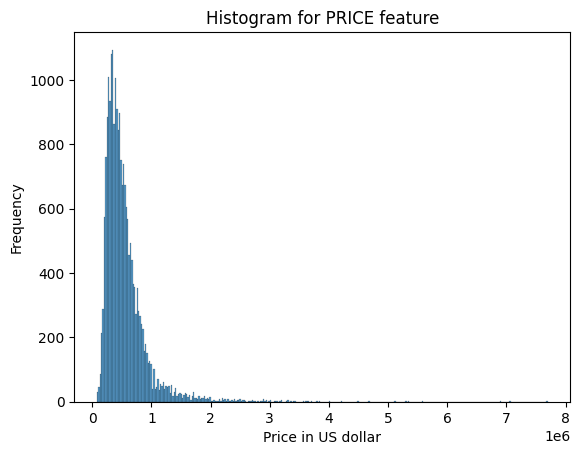

In [10]:
# Histogram for PRICE feature
sns.histplot(df['price'])
plt.title('Histogram for PRICE feature')
plt.ylabel('Frequency')
plt.xlabel('Price in US dollar')
plt.show()

In [11]:
# Create a frequency table to bedrooms feature
bedrooms_num = df['bedrooms'].value_counts().sort_index()
bedrooms_num

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

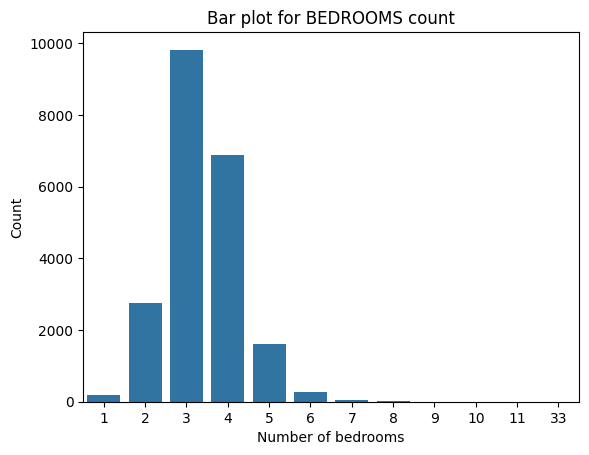

In [12]:
# Bar plot for BEDROOMS count x=name y=count
sns.barplot(x=bedrooms_num.index, y=bedrooms_num)
plt.title('Bar plot for BEDROOMS count')
plt.ylabel('Count')
plt.xlabel('Number of bedrooms')
plt.show()


In [13]:
# Create frequency table for bathrooms sorted by name
bathrooms_num = df['bathrooms'].value_counts().sort_index()
bathrooms_num

bathrooms
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64

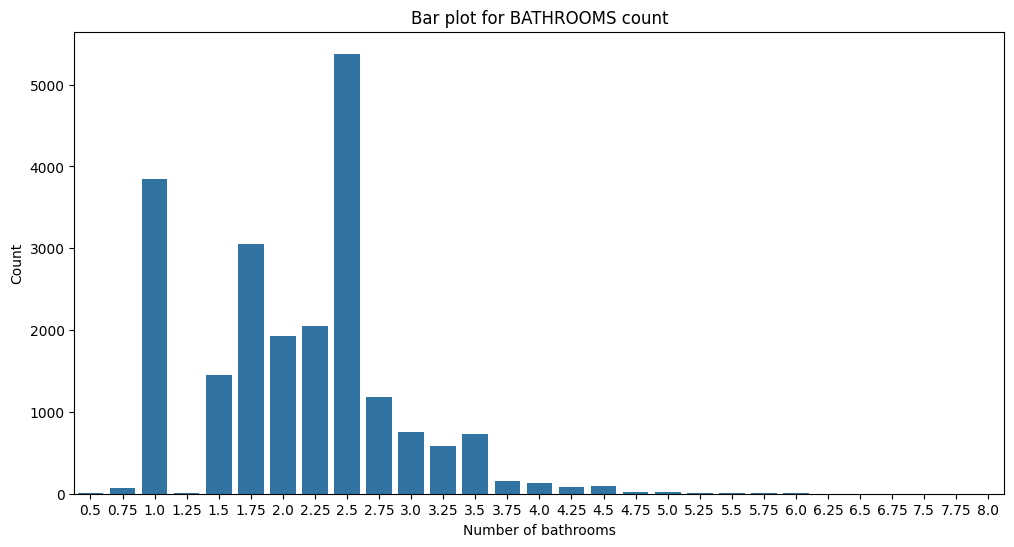

In [14]:
# Create bar plot for BATHROOMS feature
plt.figure(figsize=(12,6))
sns.barplot(x=bathrooms_num.index, y=bathrooms_num)
plt.title('Bar plot for BATHROOMS count')
plt.ylabel('Count')
plt.xlabel('Number of bathrooms')
plt.show()

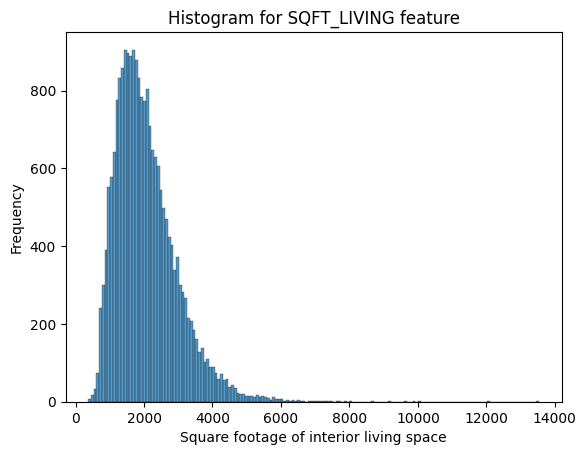

In [15]:
# Plot histogram for sqft_living feature
sns.histplot(df['sqft_living'])
plt.title('Histogram for SQFT_LIVING feature')
plt.ylabel('Frequency')
plt.xlabel('Square footage of interior living space')
plt.show()

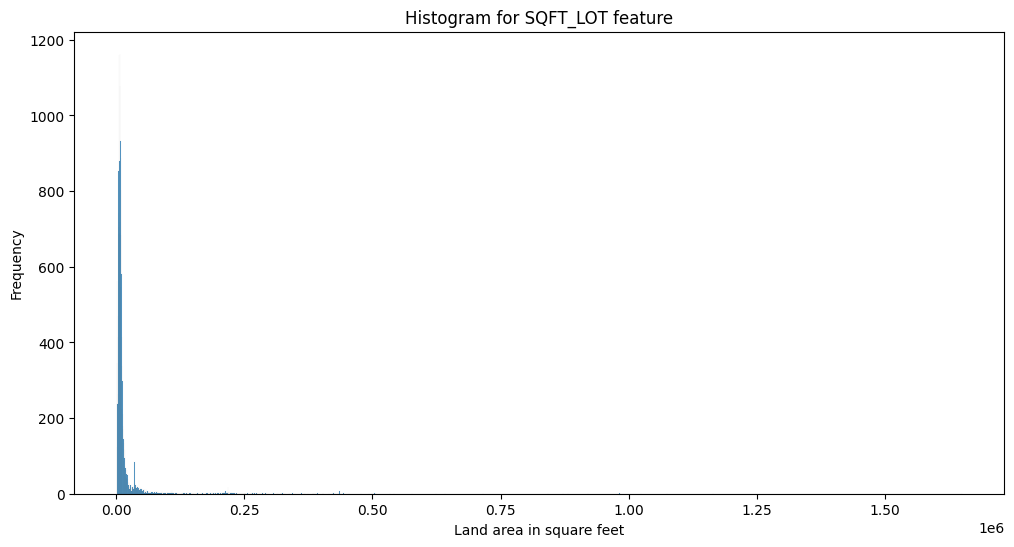

In [16]:
# Plot histogram for SQFT_LOFT feature
plt.figure(figsize=(12,6))
sns.histplot(df['sqft_lot'])
plt.title('Histogram for SQFT_LOT feature')
plt.ylabel('Frequency')
plt.xlabel('Land area in square feet')
plt.show()

In [17]:
# Create frequency table for FLOORS feature
floors_num = df['floors'].value_counts().sort_index()
floors_num

floors
1.0    10673
1.5     1910
2.0     8235
2.5      161
3.0      611
3.5        7
Name: count, dtype: int64

Text(0.5, 0, 'Number of floors')

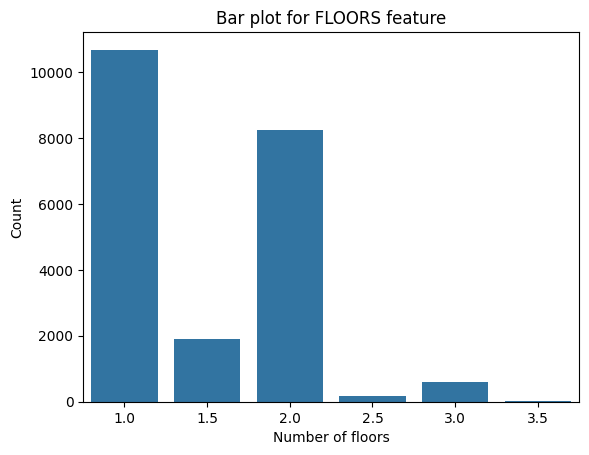

In [18]:
# Create bar plot for FLOORS feature
sns.barplot(x=floors_num.index, y=floors_num)
plt.title('Bar plot for FLOORS feature')
plt.ylabel('Count')
plt.xlabel('Number of floors')


In [19]:
# Create frequency table for WATERFRONT feature
waterfront_num = df['waterfront'].value_counts().sort_index()
waterfront_percent = (waterfront_num / len(df)) * 100
waterfront_percent

waterfront
0    99.245266
1     0.754734
Name: count, dtype: float64

99% of houses don't have waterfront view.

Text(0.5, 0, 'Waterfront view')

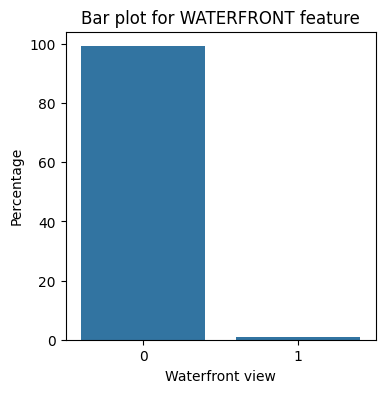

In [20]:
# Create bar plot for WATERFRONT feature
plt.figure(figsize=(4,4))
sns.barplot(x=waterfront_percent.index, y=waterfront_percent)
plt.title('Bar plot for WATERFRONT feature')
plt.ylabel('Percentage')
plt.xlabel('Waterfront view')

In [21]:
# Create frequency table for VIEW feature
view_num = df['view'].value_counts().sort_index()
view_num

view
0    19475
1      332
2      961
3      510
4      319
Name: count, dtype: int64

In [22]:
view_percent = (view_num / len(df)) * 100
view_percent

view
0    90.174561
1     1.537251
2     4.449692
3     2.361439
4     1.477057
Name: count, dtype: float64

90% of houses do not have good view.

Text(0.5, 0, 'View')

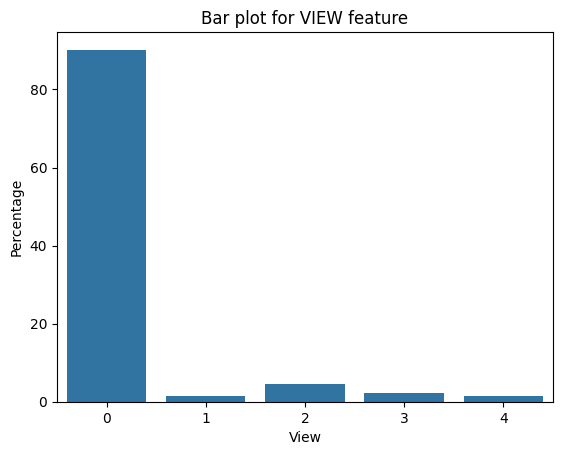

In [23]:
# Create bar plot for VIEW feature
sns.barplot(x=view_percent.index, y=view_percent)
plt.title('Bar plot for VIEW feature')
plt.ylabel('Percentage')
plt.xlabel('View')

In [24]:
# Create frequency table for CONDITION feature
condition_num = df['condition'].value_counts().sort_index()
condition_num

condition
1       29
2      170
3    14020
4     5677
5     1701
Name: count, dtype: int64

In [25]:
condition_percent = (condition_num / len(df)) * 100
condition_percent

condition
1     0.134278
2     0.787146
3    64.916424
4    26.286058
5     7.876094
Name: count, dtype: float64

64% of houses are in regular conditions.  
26% of houses are in good conditions.

Text(0.5, 0, 'Condition')

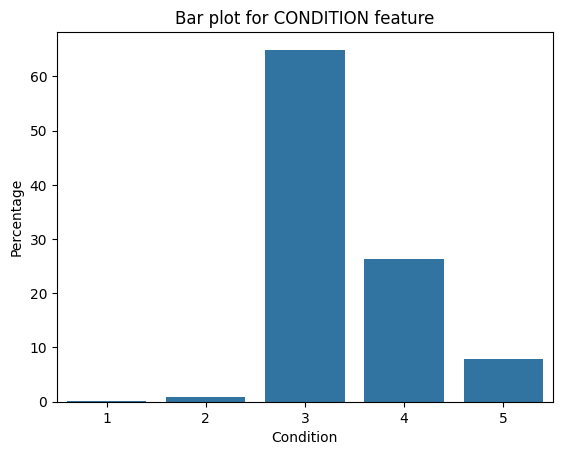

In [26]:
# Create bar plot for CONDITION feature
sns.barplot(x=condition_percent.index, y=condition_percent)
plt.title('Bar plot for CONDITION feature')
plt.ylabel('Percentage')
plt.xlabel('Condition')

In [27]:
# Create frequency table for GRADE feature
grade_num = df['grade'].value_counts().sort_index()
grade_num

grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: count, dtype: int64

In [28]:
grade_percent = (grade_num / len(df)) * 100
grade_percent

grade
3      0.004630
4      0.125017
5      1.120526
6      9.436496
7     41.552067
8     28.082604
9     12.108163
10     5.250729
11     1.847479
12     0.412094
13     0.060194
Name: count, dtype: float64

About 80% of houses are of average to good construction and design levels.

Text(0.5, 0, 'Grade')

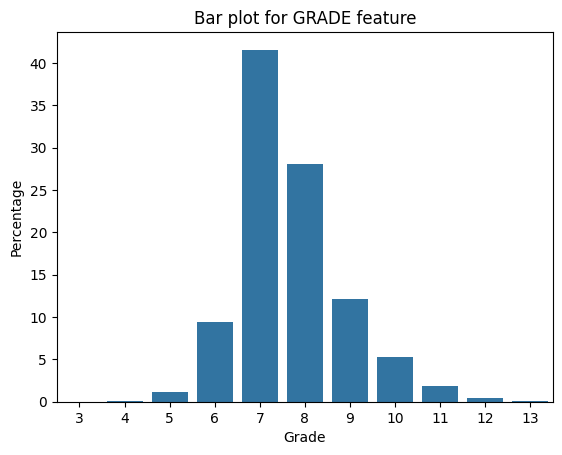

In [29]:
# Create bar plot for GRADE feature
sns.barplot(x=grade_percent.index, y=grade_percent)
plt.title('Bar plot for GRADE feature')
plt.ylabel('Percentage')
plt.xlabel('Grade')

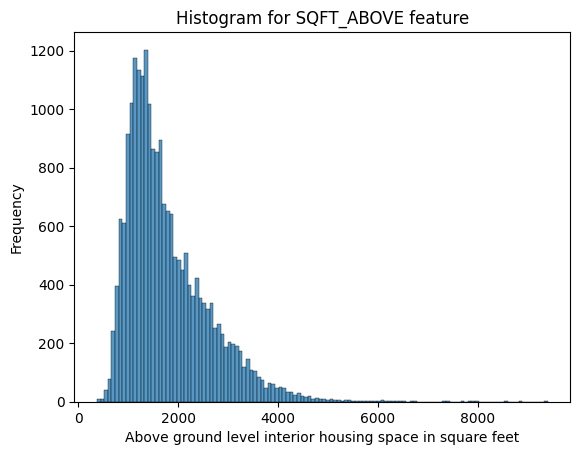

In [30]:
# Create histogram for SQFT_ABOVE feature
sns.histplot(df['sqft_above'])
plt.title('Histogram for SQFT_ABOVE feature')
plt.ylabel('Frequency')
plt.xlabel('Above ground level interior housing space in square feet')
plt.show()

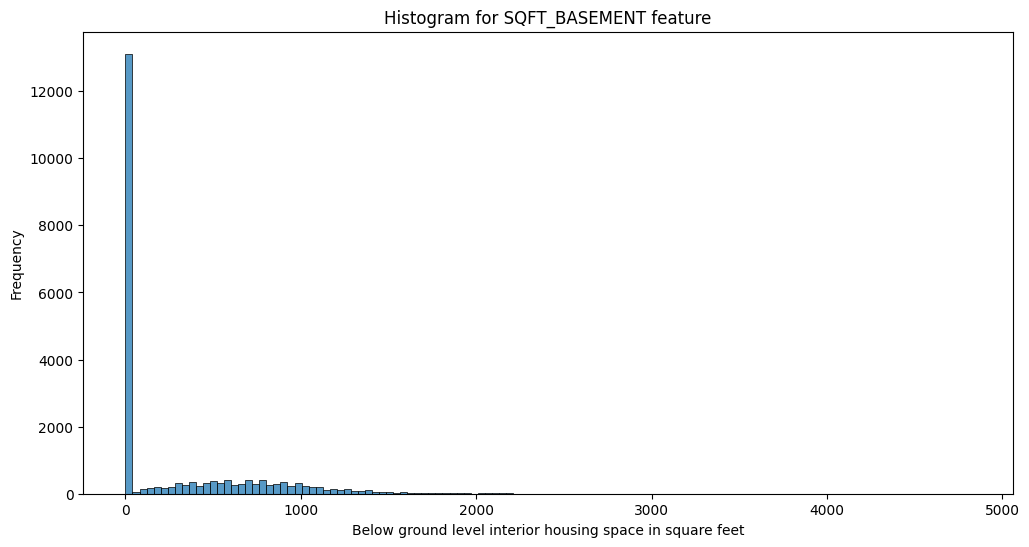

In [31]:
# Create histogram for SQFT_BASEMENT feature
plt.figure(figsize=(12,6))
sns.histplot(df['sqft_basement'])
plt.title('Histogram for SQFT_BASEMENT feature')
plt.ylabel('Frequency')
plt.xlabel('Below ground level interior housing space in square feet')
plt.show()

Most of houses does not have basement.


In [32]:
# Create frequency table for YR_BUILT feature
yr_built_num = df['yr_built'].value_counts().sort_index()
yr_built_num

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: count, Length: 116, dtype: int64

In [33]:
yr_built_percent = (yr_built_num / len(df)) * 100
yr_built_percent

yr_built
1900    0.402834
1901    0.134278
1902    0.125017
1903    0.212993
1904    0.208362
          ...   
2011    0.601935
2012    0.787146
2013    0.930685
2014    2.588322
2015    0.175950
Name: count, Length: 116, dtype: float64

In [34]:
# Create frequency table for zipcode feature
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

There are 70 different zip codes.  
In this moment this feature will be deleted.

In [35]:
# Remove zip code feature
df = df.drop('zipcode', axis=1)

In [36]:
# Create frequency table for yr_renovated feature
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Most of the houses were not renovated.  

In [37]:
# Create frequency table for sqft_basement feature
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

Most of houses do not have basement.

In [38]:
# Separate dependent and independent features, then store both as a Numpy array
X = df.drop('price', axis=1).values
y = df['price'].values

In [39]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
# Create scaler object
scaler = MinMaxScaler()

In [41]:
# Scale X_train
X_train = scaler.fit_transform(X_train)

In [42]:
# Scale X_test
X_test = scaler.fit_transform(X_test)

In [43]:
# Create model
model = Sequential()

# As we have 19 features in the dataset, that's a good idea to use 19 neurons
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# As a regression problem the ANN will have only one neuron on the last layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [44]:
# Train model
#model.fit(x=X_train, y=y_train,
#          validation_data=(X_test, y_test),
#          batch_size=128, epochs=400)

In [45]:
# Save the model
#model.save('kc_house_model.h5')

In [47]:
# Load model
model = load_model('kc_house_model.h5')

OSError: No file or directory found at kc_house_model.h5

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
# Plot losses
losses.plot()

There is no overfitting once train and test lines are almost overlapped.  
Technically speaking, it is possible to continue trainning the model.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Calculate MSE
mean_squared_error(y_test, predictions)

In [ ]:
# Calculate RMSE
np.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
# Calculate MAE
mean_absolute_error(y_test, predictions)

In [ ]:
(111828 / 540296.57) * 100

The error is about USD 111828, which seems to be a very large error.  
As the mean price is USD 540296.57, the error represents 21% of the mean.  
The model isn't good.

In [ ]:
explained_variance_score(y_test, predictions)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

### Predicting price of a single house

In [ ]:
single_house = df.drop('price', axis=1).iloc[0]

In [ ]:
single_house.values.shape

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,17))

In [ ]:
model.predict(single_house)

In [ ]:
df.head(1)

The real price is USD 221900 and the model estimates USD 259733